In [6]:
import numpy as np
from numpy import asarray
import cv2
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
# Construct a tf.data.Dataset
dataset = tfds.load(name="mnist", split=tfds.Split.TRAIN)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling mnist-train.tfrecord...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling mnist-test.tfrecord...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset mnist downloaded and prepared to C:\Users\User\tensorflow_datasets\mnist\3.0.1. Subsequent calls will reuse this data.


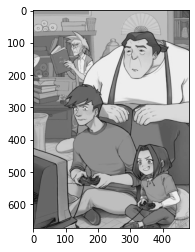

(674, 481)

In [7]:
img = cv2.imread("jak.png",cv2.IMREAD_GRAYSCALE)/255
plt.imshow(img,cmap="gray")
plt.show()
img.shape

In [9]:
class conv_op:
    def __init__(self,num_filters,filter_size):
        self.num_filters = num_filters
        self.filter_size = filter_size
        self.conv_filter = (
            # initialize a random filter 
            np.random.randn(num_filters,filter_size,filter_size)/(filter_size*filter_size)
        )
        
    def image_region(self,image):
        height , width = image.shape
        self.image = image
        for j in range(height - self.filter_size +1):
            for k in range (width - self.filter_size +1):
                image_patch = image[j : (j+self.filter_size), k : (k+self.filter_size)]
                yield (image_patch , j , k)
    def forward_prop(self , image):
        height , width = image.shape
        conv_out = np.zeros((height - self.filter_size + 1 , width - self.filter_size +1 , self.num_filters))
        for image_patch , i , j in self.image_region(image):
            conv_out[i,j] = np.sum(image_patch*self.conv_filter , axis=(1,2))
        return conv_out
    
    def back_prop(self,dl_dout,learning_rate):# take max pool (dl_dout) o/p as an i/p
        dl_df_params = np.zeros(self.conv_filter.shape)
        for image_patch , i , j in self.image_region(self.image):
            for k in range(self.num_filters):
                dl_df_params[k] += image_patch*dl_dout[i,j,k]
        #filter parameter update
        self.conv_filter -= learning_rate*dl_df_params
        return (dl_df_params)

In [39]:
conn = conv_op(15,2) # ,num_filters,filter_size
out = conn.forward_prop(img)
out.shape

(673, 480, 15)

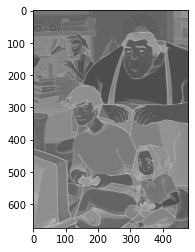

In [40]:
plt.imshow(out[:,:,10],cmap="gray")
plt.show()